
# Kinematic analysis of a six-bar gripper mechanism
*By: Jose Gabriel Tiller, [Luis M. Aristizábal](https://orcid.org/0000-0003-0607-9613)*

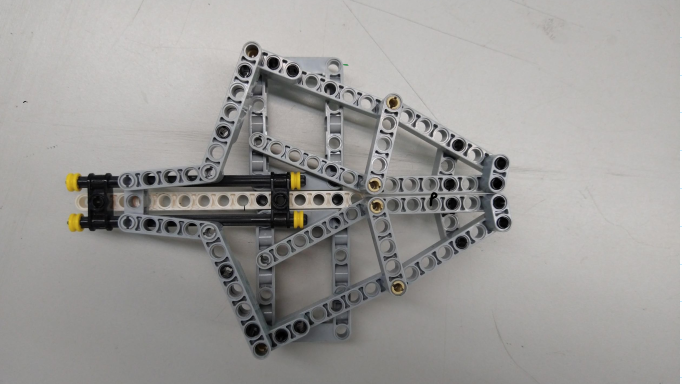

## Description

This mechanism is a design of a six-bar gripper for robotics applications. The LEGO version displayed in the upper cell is based on the following model:

In [347]:
from IPython.display import HTML,IFrame
IFrame('https://www.youtube.com/embed/qKZLx1wtFCk','100%','500')

Credits to [How To Mechatronics](https://howtomechatronics.com/) for providing the design and information (How-to Mechatronics, 2013).

Six-bar grippers are useful in many contexts, e.g., in wearable robots applications (Shim & Kim, 2018) and...

## Kinematic diagram 
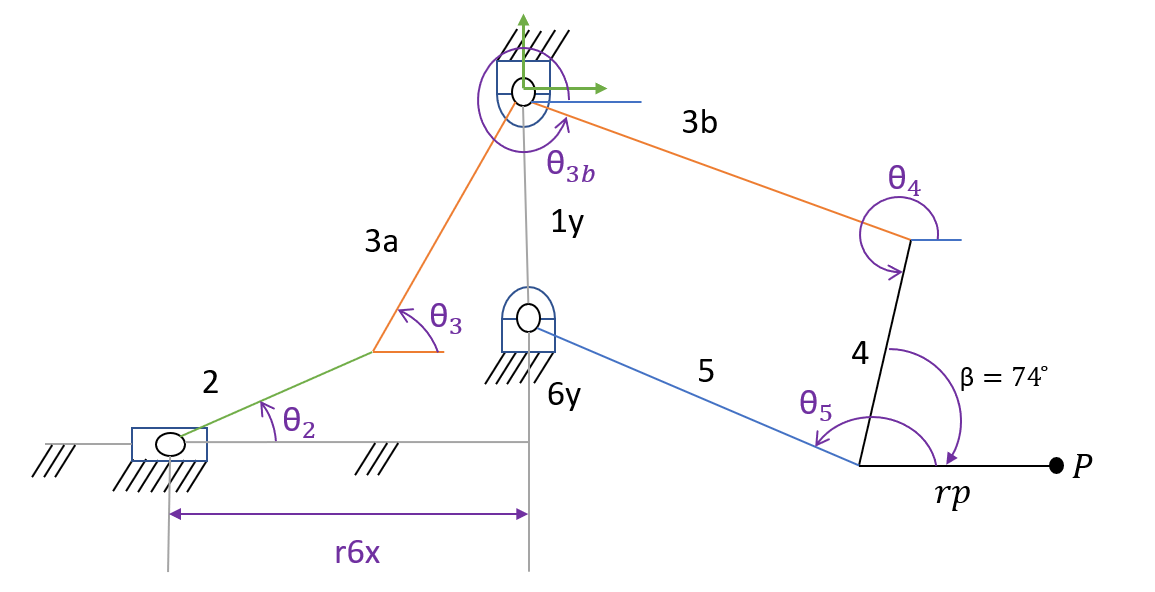


## Vector diagram
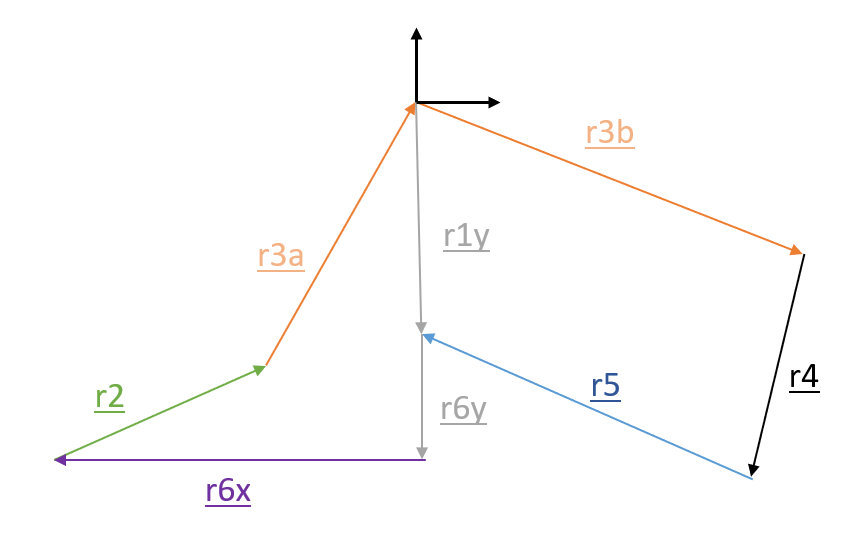

## Variables and parameters

Main variable: $r_{6x}$

Secondary variables: $\theta_2,\theta_3,\theta_4,\theta_5$

Parameters: $r_2,r_{3a},r_{3b},r_{4},r_{5},r_{1y},r_{6y},\alpha$
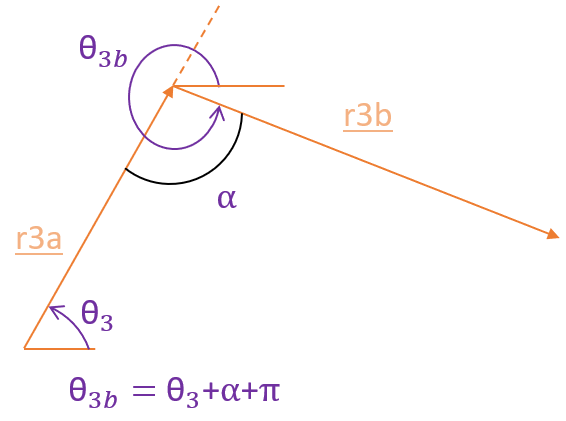



$\theta_{3b} = \theta_3 + \pi + \alpha$

## Vector equations

$-\overrightarrow{r_{3a}} - \overrightarrow{r_{2}} - \overrightarrow{r_{6x}} - \overrightarrow{r_{6y}} - \overrightarrow{r_{1y}} = 0$ (1)

$\overrightarrow{r_{3b}} + \overrightarrow{r_{4}} + \overrightarrow{r_{5}} - \overrightarrow{r_{1y}} = 0$ (2)

## Scalar equations

### Componente$\overrightarrow{i}:$
$-r_3a\cdot cos(\theta_{3})-r_2\cdot cos(\theta_{2})-r_6x\cdot cos(\pi)-r_6y\cdot cos(3\pi/2)-r_1y\cdot cos(3\pi/2)=0$

 $r_3b\cdot cos(\theta_{3}+\pi+\alpha)+r_4\cdot cos(\theta_{4})+r_5\cdot cos(\theta_{5})-r_1y\cdot cos(3\pi/2)=0$

### Componente$\overrightarrow{j}:$
$-r_3a\cdot sin(\theta_{3})-r_2\cdot sin(\theta_{2})-r_6x\cdot sin(\pi)-r_6y\cdot sin(3\pi/2)-r_1y\cdot sin(3\pi/2)=0$

 $r_3b\cdot sin(\theta_{3}+\pi+\alpha)+r_4\cdot sin(\theta_{4})+r_5\cdot sin(\theta_{5})-r_1y\cdot sin(3\pi/2)=0$

## Numerical methods implementation

### import modules
 

In [348]:
%reset -sf

import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Function definition

In [349]:
def gripper(x0,p):
    # main variable
    r6x = p['r6x']
    # parameters
    r2 = p['r2']
    r3a = p['r3a']
    r3b = p['r3b']
    r4 = p['r4']
    r5 = p['r5']
    r1y = p['r1y']
    r6y = p['r6y']
    alpha = p['alpha']
    
    # initial conditions
    th2 = x0[0]
    th3 = x0[1]
    th4 = x0[2]
    th5 = x0[3]
    
    return  [-r3a*np.cos(th3) - r2*np.cos(th2) - r6x*np.cos(np.pi) - r6y*np.cos(3*np.pi/2) - r1y*np.cos(3*np.pi/2),
            -r3a*np.sin(th3) - r2*np.sin(th2) - r6x*np.sin(np.pi) - r6y*np.sin(3*np.pi/2) - r1y*np.sin(3*np.pi/2),
            r3b*np.cos(th3+np.pi+alpha) + r4*np.cos(th4) + r5*np.cos(th5) - r1y*np.cos(3*np.pi/2),
            r3b*np.sin(th3+np.pi+alpha) + r4*np.sin(th4) + r5*np.sin(th5) - r1y*np.sin(3*np.pi/2)]  

### Function  test

In [350]:
p = {'r2' : 4,
'r3a' : 6,
'r3b' : 7,
'r4' : 4,
'r5' : 6,
'r1y' : 4,
'r6y' : 2,
'alpha' : np.pi/2,
'beta' : np.deg2rad(74),
'r6x' : 6,
'rp' : 6    
}


th2Ini = np.deg2rad(6)
th3Ini = np.deg2rad(71)
th4Ini = np.deg2rad(255)
th5Ini = np.deg2rad(154)

x0 = [th2Ini,th3Ini,th4Ini,th5Ini]

print(gripper(x0,p))

[0.0685034917839673, -0.09122530666651585, 0.19058957099013335, 0.48754649437809405]


### Solve for initial conditions

In [351]:
q,info,exitflag,mensaje = fsolve(gripper,x0,args = p,full_output = True)
print("solucion = ",np.rad2deg(q),"\n",exitflag,"\n",mensaje)

solucion =  [  4.99892174  70.37460339 255.24368938 158.29306473] 
 1 
 The solution converged.


In [352]:
th2=q[0]
th3=q[1]
th4=q[2]
th5=q[3]

### Point location
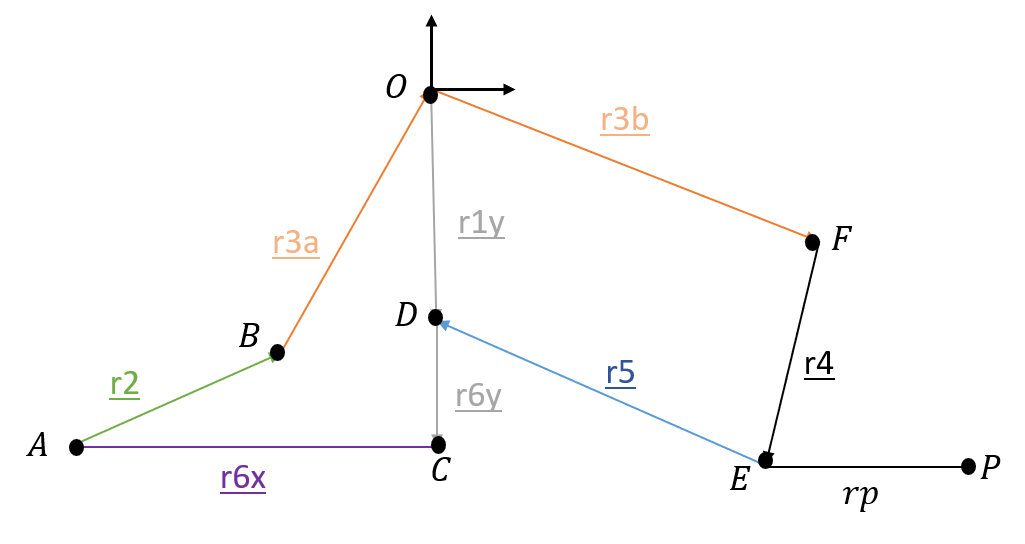

In [353]:
Dx=p['r1y']*np.cos(np.deg2rad(270))
Dy=p['r1y']*np.sin(np.deg2rad(270))
Cx=Dx+p['r6y']*np.cos(np.deg2rad(270))
Cy=Dy+p['r6y']*np.sin(np.deg2rad(270))
Ax=Cx+p['r6x']*np.cos(np.pi)
Ay=Cy+p['r6x']*np.sin(np.pi)
Bx=Ax+p['r2']*np.cos(th2)
By=Ay+p['r2']*np.sin(th2)
Ox=0
Oy=0
Fx=p['r3b']*np.cos(th3+np.pi+p['alpha'])
Fy=p['r3b']*np.sin(th3+np.pi+p['alpha'])
Ex=Fx+p['r4']*np.cos(th4)
Ey=Fy+p['r4']*np.sin(th4)
Px=Ex+p['rp']*np.cos(th4+np.pi-p['beta'])
Py=Ey+p['rp']*np.sin(th4+np.pi-p['beta'])

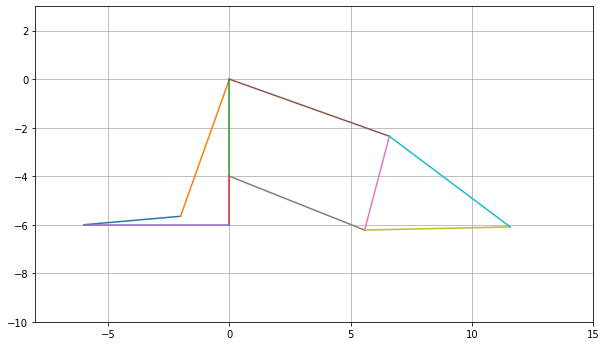

In [354]:
fig=plt.figure()
hr2=plt.plot([Ax,Bx],[Ay,By])
hr3a=plt.plot([Ox,Bx],[Oy,By])
hr1y=plt.plot([Ox,Dx],[Oy,Dy])
hr6y=plt.plot([Dx,Cx],[Dy,Cy])
hr6x=plt.plot([Cx,Ax],[Cy,Ay])
hr3b=plt.plot([Ox,Fx],[Oy,Fy])
hr4=plt.plot([Fx,Ex],[Fy,Ey])
hr5=plt.plot([Ex,Dx],[Ey,Dy])
rp1=plt.plot([Ex,Px],[Ey,Py])
rp2=plt.plot([Fx,Px],[Fy,Py])

plt.axis("scaled")
plt.xlim(-8,15)
plt.ylim(-10,3)
plt.grid()

In [355]:
numpos=50 
r6xV = np.linspace(6,3,numpos)
print(r6xV)

[6.         5.93877551 5.87755102 5.81632653 5.75510204 5.69387755
 5.63265306 5.57142857 5.51020408 5.44897959 5.3877551  5.32653061
 5.26530612 5.20408163 5.14285714 5.08163265 5.02040816 4.95918367
 4.89795918 4.83673469 4.7755102  4.71428571 4.65306122 4.59183673
 4.53061224 4.46938776 4.40816327 4.34693878 4.28571429 4.2244898
 4.16326531 4.10204082 4.04081633 3.97959184 3.91836735 3.85714286
 3.79591837 3.73469388 3.67346939 3.6122449  3.55102041 3.48979592
 3.42857143 3.36734694 3.30612245 3.24489796 3.18367347 3.12244898
 3.06122449 3.        ]


In [356]:
th2V=np.zeros(numpos)
th3V=np.zeros(numpos)
th4V=np.zeros(numpos)
th5V=np.zeros(numpos)

In [357]:
for i in range(0,numpos):
    p['r6x'] = r6xV[i]
    q,info,exitflag,mensaje = fsolve(gripper,x0,args = p,full_output = True)
    th2V[i] = q[0]
    th3V[i] = q[1]
    th4V[i] = q[2]
    th5V[i] = q[3]
    x0 = q

    print("iteración ",i,": ",th2V[i],th3V[i],th4V[i],th5V[i])
    if exitflag != 1:
        print('Error en la iteración ' + str(i))
        print(mensaje)

iteración  0 :  0.08724764348732497 1.2282685389682846 4.454842774573909 2.7627351625946153
iteración  1 :  0.08170196177887544 1.23941122251762 4.45553709630143 2.775780027247703
iteración  2 :  0.07637121708475547 1.2504783148684708 4.456188962191208 2.788729022222886
iteración  3 :  0.07124983834864647 1.2614746750259302 4.45679972835645 2.801588537796932
iteración  4 :  0.06633272832784196 1.2724048479678922 4.457370625834492 2.8143645584421595
iteración  5 :  0.06161521973855465 1.2832730941651485 4.457902771499538 2.827062701897832
iteración  6 :  0.057093036601187905 1.294083415569515 4.458397177613597 2.8396882536030823
iteración  7 :  0.05276226003789688 1.3048395785628513 4.458854760205083 2.852246197143715
iteración  8 :  0.04861929790475513 1.3155451342828606 4.459276346433971 2.8647412412618762
iteración  9 :  0.04466085773888262 1.326203436675447 4.459662681076884 2.877177843890437
iteración  10 :  0.040883922581386345 1.3368176585690754 4.460014432244496 2.88956023360234

As shown in previous cell result, there is convergence in every iteration, so we can use the solutions obtained.

### Graphs

now we use subplot to display all the graphs on the same figure:
1. create a figure with a different name from the mechanism 2D representation (called *fig*). We will be using *fig2*

In [358]:
fig2=plt.figure()

<Figure size 720x1440 with 0 Axes>

2. use 
```python 
plt.subplot(*rows*,*columns*,*index*)
```
to indicate the dimensions of the subplot and the index of the frame you are using. In this case
```python 
plt.subplot(4,1,1)
```
creates a plot with 4 rows, 1 column, and selects plot 1 as active for plotting.

3. change size of the plot with
```python
plt.rcParams['figure.figsize'] = [x, y]
```

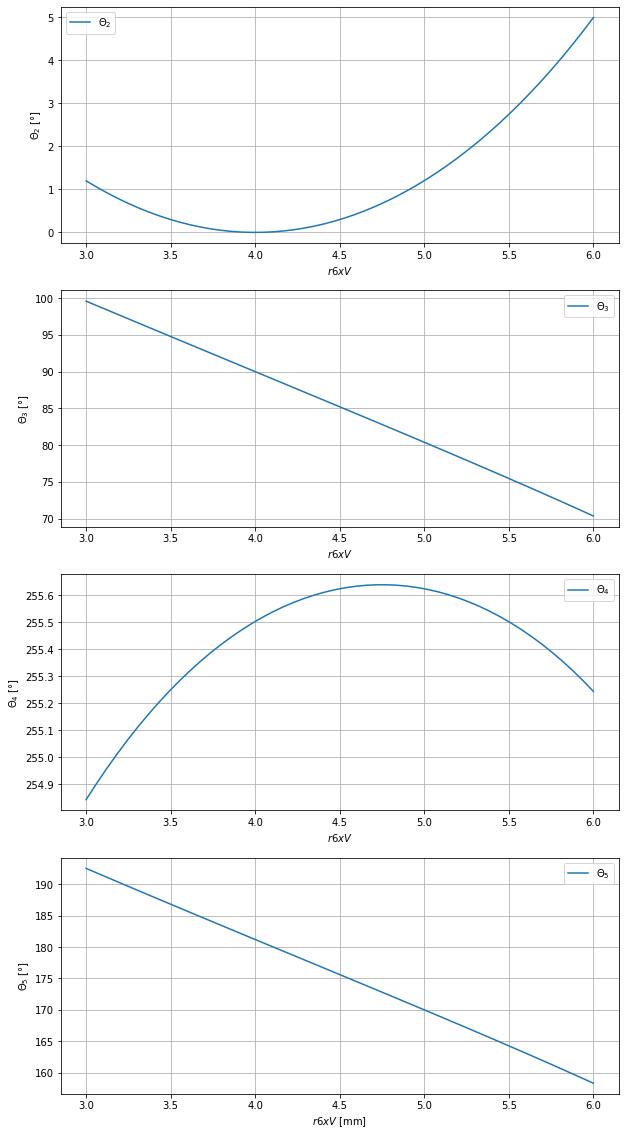

In [359]:
plt.rcParams['figure.figsize'] = [10, 20]
plt.subplot(4,1,1)
plt.plot(r6xV,np.rad2deg(th2V))
plt.legend(["$\Theta_2$"])
plt.xlabel("$r6xV$ ")
plt.ylabel("$\Theta_2$ [°]")
plt.grid()

plt.subplot(4,1,2)
plt.plot(r6xV,np.rad2deg(th3V))
plt.legend(["$\Theta_3$"])
plt.xlabel("$r6xV$ ")
plt.ylabel("$\Theta_3$ [°]")
plt.grid()

plt.subplot(4,1,3)
plt.plot(r6xV,np.rad2deg(th4V))
plt.legend(["$\Theta_4$"])
plt.xlabel("$r6xV$ ")
plt.ylabel("$\Theta_4$ [°]")
plt.grid()

plt.subplot(4,1,4)
plt.plot(r6xV,np.rad2deg(th5V))
plt.legend(["$\Theta_5$"])
plt.xlabel("$r6xV$ [mm]")
plt.ylabel("$\Theta_5$ [°]")
plt.grid()

## Analysis

<span class="mark">to be described...</span>

## Animation

### Canvas creation

we have to define (again) the canvas for animation

Text(11.57311339852945, -6.088926699259502, 'P')

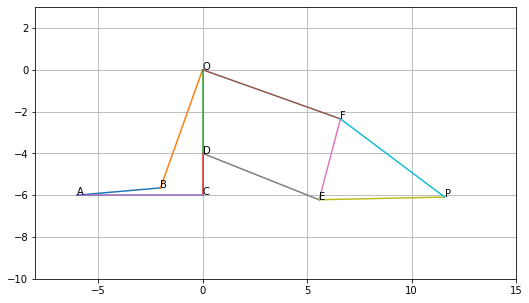

In [360]:
plt.rcParams['figure.figsize'] = [10, 5]
fig3=plt.figure()
hr2=plt.plot([Ax,Bx],[Ay,By])
hr3a=plt.plot([Ox,Bx],[Oy,By])
hr1y=plt.plot([Ox,Dx],[Oy,Dy])
hr6y=plt.plot([Dx,Cx],[Dy,Cy])
hr6x=plt.plot([Cx,Ax],[Cy,Ay])
hr3b=plt.plot([Ox,Fx],[Oy,Fy])
hr4=plt.plot([Fx,Ex],[Fy,Ey])
hr5=plt.plot([Ex,Dx],[Ey,Dy])
hrp1=plt.plot([Ex,Px],[Ey,Py])
hrp2=plt.plot([Fx,Px],[Fy,Py])

plt.axis("scaled")
plt.xlim(-8,15)
plt.ylim(-10,3)
plt.grid()

ax = hr2[0].axes
ax.annotate('O',(Ox,Oy))
ax.annotate('A',(Ax,Ay))
ax.annotate('B',(Bx,By))
ax.annotate('C',(Cx,Cy))
ax.annotate('D',(Dx,Dy))
ax.annotate('E',(Ex,Ey))
ax.annotate('F',(Fx,Fy))
ax.annotate('P',(Px,Py))

In [361]:
AxV=-r6xV
Ay=Cy
BxV=AxV+p['r2']*np.cos(th2V)
ByV=Ay+p['r2']*np.sin(th2V)
FxV=p['r3b']*np.cos(th3V+np.pi+p['alpha'])
FyV=p['r3b']*np.sin(th3V+np.pi+p['alpha'])
ExV=FxV+p['r4']*np.cos(th4V)
EyV=FyV+p['r4']*np.sin(th4V)
Dx = 0
Dy = -p['r1y']
PxV=ExV+p['rp']*np.cos(th4V+np.pi-p['beta'])
PyV=EyV+p['rp']*np.sin(th4V+np.pi-p['beta'])

In [362]:
from matplotlib.animation import FuncAnimation

def animar(i):
    pr2x = np.array([AxV[i],BxV[i]])
    pr2y = np.array([Ay,ByV[i]])
    pr3ax=np.array([Ox,BxV[i]])
    pr3ay=np.array([Oy,ByV[i]])
    pr3bx=np.array([Ox,FxV[i]])
    pr3by=np.array([Oy,FyV[i]])
    pr4x=np.array([FxV[i],ExV[i]])
    pr4y=np.array([FyV[i],EyV[i]])
    pr5x=np.array([ExV[i],Dx])
    pr5y=np.array([EyV[i],Dy])
    pr6x=np.array([Ox,AxV[i]])
    #point of interest
    prp1x=np.array([ExV[i],PxV[i]])
    prp1y=np.array([EyV[i],PyV[i]])
    prp2x=np.array([FxV[i],PxV[i]])
    prp2y=np.array([FyV[i],PyV[i]])
    
    hr2[0].set_xdata(pr2x)
    hr2[0].set_ydata(pr2y)
    hr3a[0].set_xdata(pr3ax)
    hr3a[0].set_ydata(pr3ay)
    hr3b[0].set_xdata(pr3bx)
    hr3b[0].set_ydata(pr3by)
    hr4[0].set_xdata(pr4x)
    hr4[0].set_ydata(pr4y)
    hr5[0].set_xdata(pr5x)
    hr5[0].set_ydata(pr5y)
    hr6x[0].set_xdata(pr6x)
    hrp1[0].set_xdata(prp1x)
    hrp1[0].set_ydata(prp1y)
    hrp2[0].set_xdata(prp2x)
    hrp2[0].set_ydata(prp2y)
    
    return hr2[0],hr3a[0],hr3b[0],hr4[0],hr5[0],hr6x[0],hrp1[0],hrp2[0],

## Animation parameters

In [363]:
from matplotlib.animation import FuncAnimation

videoLength = 5000 # en milisegundos
maxFrames = 80
increment = int(np.ceil(numpos/maxFrames))
totalFrames = range(0,numpos,increment)
animacion = FuncAnimation(fig3, 
                          animar, 
                          frames = totalFrames,
                          interval=videoLength/len(totalFrames),
                          save_count=len(totalFrames),
                          blit=True)

## Display

In [364]:
#En Jupyter se pueden mostrar las animaciones directamente en el cuaderno
from IPython.display import HTML

# Comentar para reducir tamaño del cuaderno, generar animación en formato gif o mp4, requiere instalar ffmpeg
#animacion.save('animation.mp4', writer='ffmpeg', fps=15)
HTML(animacion.to_jshtml())

<div class="burk">
End of "Trabajo 1"

A continuación se implementa un ejemplo de lo que se requiere para el Trabajo 2.</span></div><i class="fa fa-lightbulb-o "></i>

<span class="mark">Si va a utilizar este cuaderno como referencia, tenga presente que NO ES OBLIGATORIO hacer la derivación con sympy, puede hacerlo a mano e ingresar las matrices A y vector b directamente. Como la derivación usando herramientas simbólicas es algo extra, los monitores no tienen la responsabilidad de resolver dudas en este aspecto.</span>

## Velocity Analysis

debemos derivar las ecuaciones de posición con respecto al tiempo. Usaremos el módulo de matemáticas simbólicas "Sympy"

In [365]:
import sympy as sym
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

sym.init_printing(use_unicode=False, wrap_line=True)
init_vprinting()

Ahora definimos el tiempo como variable independiente, luego todas las demás variables dependientes del tiempo

In [366]:
t = sym.Symbol('t')
# Parámetros
r2s = sym.Symbol('r_2')
r3as = sym.Symbol('r_{3a}')
r3bs = sym.Symbol('r_{3b}')
r4s = sym.Symbol('r_{4}')
r5s = sym.Symbol('r_{5}')
r1ys = sym.Symbol('r_{1y}')
r6ys = sym.Symbol('r_{6y}')
alphas = sym.Symbol('alpha')
# Variables definidas como funcion para luego hacerlas depender de t
th2s, th3s, th4s, th5s, r6xs = sym.symbols('theta_2 theta_3 theta_4 theta_5 r_{6x}', cls=sym.Function)
# Primera derivada de las variables con respecto al tiempo
th2sp = sym.diff(th2s(t),t)
th3sp = sym.diff(th3s(t),t)
th4sp = sym.diff(th4s(t),t)
th5sp = sym.diff(th5s(t),t)
r6xsp = sym.diff(r6xs(t),t)
(r2s,r3as,r3bs,r4s,r5s,r1ys,r6ys),(th2sp,th3sp,th4sp,th5sp,r6xsp)

Luego derivamos cada una de las expresiones de las ecuaciones de posición con respecto a t:

Partimos de las ecuaciones implementadas en la función:
```python
    Y[0] = -r3a*np.cos(th3) - r2*np.cos(th2) - r6x*np.cos(np.pi) - r6y*np.cos(3*np.pi/2) - r1y*np.cos(3*np.pi/2)
    Y[1] = -r3a*np.sin(th3) - r2*np.sin(th2) - r6x*np.sin(np.pi) - r6y*np.sin(3*np.pi/2) - r1y*np.sin(3*np.pi/2)
    Y[2] = r3b*np.cos(th3+np.pi+alpha) + r4*np.cos(th4) + r5*np.cos(th5) - r1y*np.cos(3*np.pi/2)
    Y[3] = r3b*np.sin(th3+np.pi+alpha) + r4*np.sin(th4) + r5*np.sin(th5) - r1y*np.sin(3*np.pi/2)       
``` 
Las ecuaciones a derivar se implementarían así (notemos las semejanzas con las anteriores):

In [367]:
eq1 = -r3as*sym.cos(th3s(t)) - r2s*sym.cos(th2s(t)) - r6xs(t)*sym.cos(sym.pi) - r6ys*sym.cos(3*sym.pi/2) - r1ys*sym.cos(3*sym.pi/2)
eq2 = -r3as*sym.sin(th3s(t)) - r2s*sym.sin(th2s(t)) - r6xs(t)*sym.sin(sym.pi) - r6ys*sym.sin(3*sym.pi/2) - r1ys*sym.sin(3*sym.pi/2)
eq3 = r3bs*sym.cos(th3s(t)+sym.pi+alphas) + r4s*sym.cos(th4s(t)) + r5s*sym.cos(th5s(t)) - r1ys*sym.cos(3*sym.pi/2) 
eq4 = r3bs*sym.sin(th3s(t)+sym.pi+alphas) + r4s*sym.sin(th4s(t)) + r5s*sym.sin(th5s(t)) - r1ys*sym.sin(3*sym.pi/2)  
eq1,eq2,eq3,eq4

Ahora las derivamos con respecto al tiempo

In [368]:
eq1p = sym.diff(eq1,t)
eq2p = sym.diff(eq2,t)
eq3p = sym.diff(eq3,t)
eq4p = sym.diff(eq4,t)
eq1p

In [369]:
eq2p

In [370]:
eq3p

In [371]:
eq4p

las primeras derivadas de las ecuaciones de posición con respecto al tiempo son:

$\displaystyle r_{2} \operatorname{sin}\left(\theta_{2}\right) \dot{\theta}_{2} + r_{3a} \operatorname{sin}\left(\theta_{3}\right) \dot{\theta}_{3} + \dot{r}_{{6x}} = 0$

$\displaystyle - r_{2} \operatorname{cos}\left(\theta_{2}\right) \dot{\theta}_{2} - r_{3a} \operatorname{cos}\left(\theta_{3}\right) \dot{\theta}_{3} = 0$

$\displaystyle r_{3b} \operatorname{sin}\left(\alpha + \theta_{3}\right) \dot{\theta}_{3} - r_{4} \operatorname{sin}\left(\theta_{4}\right) \dot{\theta}_{4} - r_{5} \operatorname{sin}\left(\theta_{5}\right) \dot{\theta}_{5} = 0$

$\displaystyle - r_{3b} \operatorname{cos}\left(\alpha + \theta_{3}\right) \dot{\theta}_{3} + r_{4} \operatorname{cos}\left(\theta_{4}\right) \dot{\theta}_{4} + r_{5} \operatorname{cos}\left(\theta_{5}\right) \dot{\theta}_{5} = 0$

Teniendo estas ecuaciones, podemos conformar el sistema matricial $Ax=b$ y resolver usando herramientas de álgebra lineal

$A = \displaystyle \left[\begin{matrix}r_{2} \operatorname{sin}\left(\theta_{2}\right) & r_{3a} \operatorname{sin}\left(\theta_{3}\right) & 0 & 0\\- r_{2} \operatorname{cos}\left(\theta_{2}\right) & - r_{3a} \operatorname{cos}\left(\theta_{3}\right) & 0 & 0\\0 & r_{3b} \operatorname{sin}\left(\alpha + \theta_{3}\right) & - r_{4} \operatorname{sin}\left(\theta_{4}\right) & - r_{5} \operatorname{sin}\left(\theta_{5}\right)\\0 & - r_{3b} \operatorname{cos}\left(\alpha + \theta_{3}\right) & r_{4} \operatorname{cos}\left(\theta_{4}\right) & r_{5} \operatorname{cos}\left(\theta_{5}\right)\end{matrix}\right]$

$b = \displaystyle \left[\begin{matrix}- \dot{r_{6x}}\\0\\0\\0\end{matrix}\right]$

Si se desea usar sympy para resolver el sistema, puede ver las siguientes celdas, aunque debe tener presente que requiere prestar mucha atención a la sintaxis particular que se utiliza.

#### Expresando el sistema de ecuaciones en forma matricial

Para hacer esto debemos usar la función "linear_eq_to_matrix", el problema es que esta función no reconoce las derivadas como las incógnitas, hay que reemplazar las derivadas por símbolos para generar el sistema matricial

In [372]:
th2spsym, th3spsym, th4spsym, th5spsym, r6xspsym = sym.symbols('\dot{\\theta_2} \dot{\\theta_3} \dot{\\theta_4} \dot{\\theta_5} \dot{r_{6x}}')
th2spsym,th3spsym,th4spsym,th5spsym,r6xspsym

Podemos observar que estos símbolos son idénticos a las derivadas con respecto al tiempo, pero al definirlos de esta forma, para sympy no están relacionados con el tiempo (t).

Ahora solo debemos reemplazar usando la función "subs" de sympy.

In [373]:
eq1psym = eq1p.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym),
                  (th5sp,th5spsym),
                  (r6xsp,r6xspsym)
                   ])
eq2psym = eq2p.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym),
                  (th5sp,th5spsym),
                  (r6xsp,r6xspsym)
                   ])
eq3psym = eq3p.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym),
                  (th5sp,th5spsym),
                  (r6xsp,r6xspsym)
                   ])
eq4psym = eq4p.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym),
                  (th5sp,th5spsym),
                  (r6xsp,r6xspsym)
                   ])
eqns = [eq1psym,eq2psym,eq3psym,eq4psym]
As, bs = sym.linear_eq_to_matrix(eqns, [th2spsym,th3spsym,th4spsym,th5spsym])
As

⎡r₂⋅sin(θ₂)     r_{3a}⋅sin(θ₃)           0               0       ⎤
⎢                                                                ⎥
⎢-r₂⋅cos(θ₂)    -r_{3a}⋅cos(θ₃)          0               0       ⎥
⎢                                                                ⎥
⎢     0       r_{3b}⋅sin(α + θ₃)   -r_{4}⋅sin(θ₄)  -r_{5}⋅sin(θ₅)⎥
⎢                                                                ⎥
⎣     0       -r_{3b}⋅cos(α + θ₃)  r_{4}⋅cos(θ₄)   r_{5}⋅cos(θ₅) ⎦

In [374]:
bs

⎡-\dot{r_{6x}}⎤
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎣      0      ⎦

### Variable de entrada

En este caso, la variable de entrada es $\dot{r_{6x}}$, por lo cual debemos dar valores a $\dot{r_{6x}}$. Vamos a asumir en este caso que la corredera se desplaza a 10 unidad/s

In [375]:
r6xp = -10

### Solución por método analítico

In [376]:
# definir vectores donde va a almacenar las soluciones
th2pv = np.zeros(numpos)
th3pv = np.zeros(numpos)
th4pv = np.zeros(numpos)
th5pv = np.zeros(numpos)
for i in range(0,numpos):
    # Analytical solution
    am = [[p['r2']*np.sin(th2V[i]),p['r3a']*np.sin(th3V[i]),0,0],
          [-p['r2']*np.cos(th2V[i]),-p['r3a']*np.cos(th3V[i]),0,0],
          [0,p['r3b']*np.sin(p['alpha'] + th3V[i]), -p['r4']*np.sin(th4V[i]), -p['r5']*np.sin(th5V[i])],
          [0,-p['r3b']*np.cos(p['alpha'] + th3V[i]), p['r4']*np.cos(th4V[i]), p['r5']*np.cos(th5V[i])]]
    bv = [-r6xp,
          0,
          0,
          0]
    [th2pv[i],th3pv[i],th4pv[i],th5pv[i]] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
    
th2pv

array([-0.92367212, -0.88808299, -0.85344513, -0.81967723, -0.78670566,
       -0.75446346, -0.72288963, -0.69192843, -0.66152877, -0.63164376,
       -0.60223023, -0.57324837, -0.54466139, -0.51643522, -0.48853828,
       -0.4609412 , -0.43361669, -0.4065393 , -0.37968531, -0.35303255,
       -0.32656031, -0.30024921, -0.27408111, -0.24803901, -0.222107  ,
       -0.19627015, -0.17051448, -0.14482688, -0.11919509, -0.09360761,
       -0.06805371, -0.04252335, -0.0170072 ,  0.00850345,  0.03401667,
        0.05953994,  0.08508014,  0.11064358,  0.13623605,  0.16186276,
        0.18752844,  0.21323726,  0.23899292,  0.26479859,  0.29065697,
        0.31657027,  0.34254019,  0.368568  ,  0.39465444,  0.42079982])

### (Opcional) Solución usando herramientas simbólicas 

Para evaluar una expresión simbólica debemos usar la función "lambdify". Para esto: 
1. creamos una lista con los símbolos que queremos reemplazar por números, 
2. luego creamos una función usando sym.lambdify que evalua dichos símbolos de la expresión a evaluar (en este caso As y bs), 
3. por último llamamos a la función creada especificando los valores numéricos a utilizar. 

El resutlado es la expresión simbólica evaluada en esos números

In [377]:
# Matriz A
# definir símbolos a evaluar
varA = [r2s,r3as,r3bs,r4s,r5s,alphas,th2s(t),th3s(t),th4s(t),th5s(t)]
# crear función a partir de la expresión simbólica
a_func = sym.lambdify(varA, As, modules='numpy')
# Vector b
varb = [r6xspsym]
b_func = sym.lambdify(varb, bs, modules='numpy')

th2pvsym = np.zeros(numpos)
th3pvsym = np.zeros(numpos)
th4pvsym = np.zeros(numpos)
th5pvsym = np.zeros(numpos)
# evaluar con valores numéricos específicos
for i in range(0,numpos):
    # Solution using Sympy and lambdify
    am = a_func(p['r2'],p['r3a'],p['r3b'],p['r4'],p['r5'],p['alpha'],th2V[i],th3V[i],th4V[i],th5V[i])
    bv = b_func(r6xp).reshape(4) # reshape para que quede como vector de una dimensión y no saque warnings.
    [th2pvsym[i],th3pvsym[i],th4pvsym[i],th5pvsym[i]] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
# print(th2p,th3p,th4p,th5p)
th2pvsym

array([-0.92367212, -0.88808299, -0.85344513, -0.81967723, -0.78670566,
       -0.75446346, -0.72288963, -0.69192843, -0.66152877, -0.63164376,
       -0.60223023, -0.57324837, -0.54466139, -0.51643522, -0.48853828,
       -0.4609412 , -0.43361669, -0.4065393 , -0.37968531, -0.35303255,
       -0.32656031, -0.30024921, -0.27408111, -0.24803901, -0.222107  ,
       -0.19627015, -0.17051448, -0.14482688, -0.11919509, -0.09360761,
       -0.06805371, -0.04252335, -0.0170072 ,  0.00850345,  0.03401667,
        0.05953994,  0.08508014,  0.11064358,  0.13623605,  0.16186276,
        0.18752844,  0.21323726,  0.23899292,  0.26479859,  0.29065697,
        0.31657027,  0.34254019,  0.368568  ,  0.39465444,  0.42079982])

### Numerical verification

In [378]:
th3pNumv=np.gradient(th3V,r6xV)*r6xp
th4pNumv=np.gradient(th4V,r6xV)*r6xp
th5pNumv=np.gradient(th5V,r6xV)*r6xp
th2pNumv=np.gradient(th2V,r6xV)*r6xp

th2pNumv

array([-0.90579468, -0.88824149, -0.85359008, -0.81980992, -0.78682719,
       -0.75457482, -0.72299171, -0.69202199, -0.66161452, -0.63172232,
       -0.60230216, -0.57331417, -0.54472151, -0.51649008, -0.48858824,
       -0.46098662, -0.43365787, -0.40657652, -0.37971884, -0.35306263,
       -0.32658716, -0.30027303, -0.2741021 , -0.24805735, -0.22212286,
       -0.19628368, -0.17052582, -0.14483618, -0.11920247, -0.0936132 ,
       -0.06805763, -0.04252572, -0.01700811,  0.00850388,  0.03401835,
        0.05954276,  0.08508401,  0.11064842,  0.13624176,  0.16186926,
        0.18753563,  0.21324507,  0.23900126,  0.26480738,  0.29066613,
        0.31657971,  0.34254984,  0.36857777,  0.39466426,  0.40772222])

### Velocity Graphs

Text(0.5, 0, 'r_{6x} [unidades]')

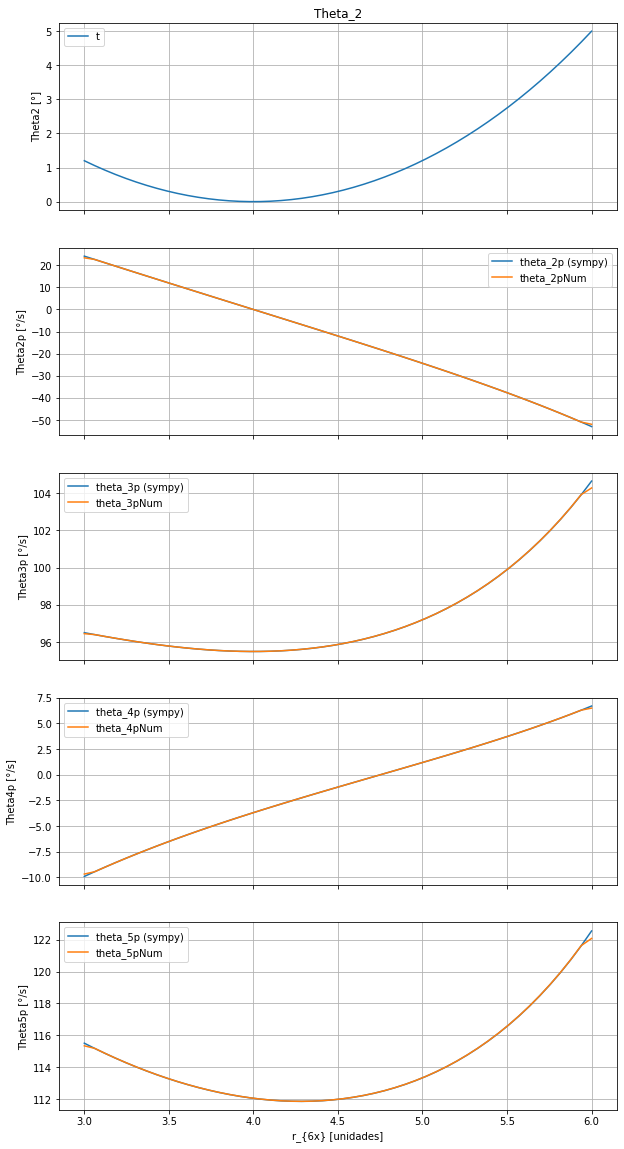

In [379]:
plt.rcParams['figure.figsize'] = [10, 20]
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True)
ax1.plot(r6xV,np.rad2deg(th2V))
ax1.set_title('Theta_2')
ax1.grid()
ax1.legend("theta_2")
ax1.set_ylabel("Theta2 [°]")

ax2.plot(r6xV,np.rad2deg(th2pv))
ax2.plot(r6xV,np.rad2deg(th2pNumv))
ax2.grid()
ax2.legend(["theta_2p (sympy)","theta_2pNum"])
ax2.set_ylabel("Theta2p [°/s]")

ax3.plot(r6xV,np.rad2deg(th3pv))
ax3.plot(r6xV,np.rad2deg(th3pNumv))
ax3.grid()
ax3.legend(["theta_3p (sympy)","theta_3pNum"])
ax3.set_ylabel("Theta3p [°/s]")


ax4.plot(r6xV,np.rad2deg(th4pv))
ax4.plot(r6xV,np.rad2deg(th4pNumv))
ax4.grid()
ax4.legend(["theta_4p (sympy)","theta_4pNum"])
ax4.set_ylabel("Theta4p [°/s]")

ax5.plot(r6xV,np.rad2deg(th5pv))
ax5.plot(r6xV,np.rad2deg(th5pNumv))
ax5.grid()
ax5.legend(["theta_5p (sympy)","theta_5pNum"])
ax5.set_ylabel("Theta5p [°/s]")
ax5.set_xlabel("r_{6x} [unidades]")


### segundas derivadas con respecto al tiempo (opcional, usando herramientas simbólicas)


In [380]:
# Segundas derivadas de las variables con respecto al tiempo
th2spp = sym.diff(th2sp,t)
th3spp = sym.diff(th3sp,t)
th4spp = sym.diff(th4sp,t)
th5spp = sym.diff(th5sp,t)
r6xspp = sym.diff(r6xsp,t)

In [381]:
eq1pp = sym.diff(eq1p,t)
eq2pp = sym.diff(eq2p,t)
eq3pp = sym.diff(eq3p,t)
eq4pp = sym.diff(eq4p,t)
eq1pp

In [382]:
eq2pp

In [383]:
eq3pp

In [384]:
eq4pp

las primeras derivadas de las ecuaciones de posición con respecto al tiempo son:

$\displaystyle r_{2} \operatorname{sin}\left(\theta_{2}\right) \ddot{\theta}_{2} + r_{2} \operatorname{cos}\left(\theta_{2}\right) \dot{\theta}_{2}^{2} + r_{3a} \operatorname{sin}\left(\theta_{3}\right) \ddot{\theta}_{3} + r_{3a} \operatorname{cos}\left(\theta_{3}\right) \dot{\theta}_{3}^{2} + \ddot{r}_{{6x}} = 0$

$\displaystyle r_{2} \operatorname{sin}\left(\theta_{2}\right) \dot{\theta}_{2}^{2} - r_{2} \operatorname{cos}\left(\theta_{2}\right) \ddot{\theta}_{2} + r_{3a} \operatorname{sin}\left(\theta_{3}\right) \dot{\theta}_{3}^{2} - r_{3a} \operatorname{cos}\left(\theta_{3}\right) \ddot{\theta}_{3} = 0$

$\displaystyle r_{3b} \operatorname{sin}\left(\alpha + \theta_{3}\right) \ddot{\theta}_{3} + r_{3b} \operatorname{cos}\left(\alpha + \theta_{3}\right) \dot{\theta}_{3}^{2} - r_{4} \operatorname{sin}\left(\theta_{4}\right) \ddot{\theta}_{4} - r_{4} \operatorname{cos}\left(\theta_{4}\right) \dot{\theta}_{4}^{2} - r_{5} \operatorname{sin}\left(\theta_{5}\right) \ddot{\theta}_{5} - r_{5} \operatorname{cos}\left(\theta_{5}\right) \dot{\theta}_{5}^{2} = 0$

$\displaystyle r_{3b} \operatorname{sin}\left(\alpha + \theta_{3}\right) \dot{\theta}_{3}^{2} - r_{3b} \operatorname{cos}\left(\alpha + \theta_{3}\right) \ddot{\theta}_{3} - r_{4} \operatorname{sin}\left(\theta_{4}\right) \dot{\theta}_{4}^{2} + r_{4} \operatorname{cos}\left(\theta_{4}\right) \ddot{\theta}_{4} - r_{5} \operatorname{sin}\left(\theta_{5}\right) \dot{\theta}_{5}^{2} + r_{5} \operatorname{cos}\left(\theta_{5}\right) \ddot{\theta}_{5} = 0$

Teniendo estas ecuaciones, podemos conformar el sistema matricial $Ax=b$ y resolver usando herramientas de álgebra lineal

La matriz A se mantiene, por lo cual sólo especificamos el vector b

$b = \displaystyle \left[\begin{matrix}- \ddot{r_{6x}} - r_{2} \operatorname{cos}\left(\theta_{2}\right) \dot{\theta}_{2}^{2} - r_{3a} \operatorname{cos}\left(\theta_{3}\right) \dot{\theta}_{3}^{2}\\- r_{2} \operatorname{sin}\left(\theta_{2}\right) \dot{\theta}_{2}^{2} - r_{3a} \operatorname{sin}\left(\theta_{3}\right) \dot{\theta}_{3}^{2}\\- r_{3b} \operatorname{cos}\left(\alpha + \theta_{3}\right) \dot{\theta}_{3}^{2} + r_{4} \operatorname{cos}\left(\theta_{4}\right) \dot{\theta}_{4}^{2} + r_{5} \operatorname{cos}\left(\theta_{5}\right) \dot{\theta}_{5}^{2}\\- r_{3b} \operatorname{sin}\left(\alpha + \theta_{3}\right) \dot{\theta}_{3}^{2} + r_{4} \operatorname{sin}\left(\theta_{4}\right) \dot{\theta}_{4}^{2} + r_{5} \operatorname{sin}\left(\theta_{5}\right) \dot{\theta}_{5}^{2}\end{matrix}\right]$

Si se desea usar sympy para resolver el sistema, puede ver las siguientes celdas, aunque debe tener presente que requiere prestar mucha atención a la sintaxis particular que se utiliza.

#### Expresando el sistema de ecuaciones en forma matricial

Para hacer esto debemos usar la función "linear_eq_to_matrix", el problema es que esta función no reconoce las derivadas como las incógnitas, hay que reemplazar las derivadas por símbolos para generar el sistema matricial

In [385]:
th2sppsym, th3sppsym, th4sppsym, th5sppsym, r6xsppsym = sym.symbols('\ddot{\\theta_2} \ddot{\\theta_3} \ddot{\\theta_4} \ddot{\\theta_5} \ddot{r_{6x}}')

Podemos observar que estos símbolos son idénticos a las derivadas con respecto al tiempo, pero al definirlos de esta forma, para sympy no están relacionados con el tiempo (t).

Ahora solo debemos reemplazar usando la función "subs" de sympy.

In [386]:
eq1ppsym = eq1pp.subs([
                  (th2spp,th2sppsym),
                  (th3spp,th3sppsym),
                  (th4spp,th4sppsym),
                  (th5spp,th5sppsym),
                  (r6xspp,r6xsppsym)
                   ])
eq2ppsym = eq2pp.subs([
                  (th2spp,th2sppsym),
                  (th3spp,th3sppsym),
                  (th4spp,th4sppsym),
                  (th5spp,th5sppsym),
                  (r6xspp,r6xsppsym)
                   ])
eq3ppsym = eq3pp.subs([
                  (th2spp,th2sppsym),
                  (th3spp,th3sppsym),
                  (th4spp,th4sppsym),
                  (th5spp,th5sppsym),
                  (r6xspp,r6xsppsym)
                   ])
eq4ppsym = eq4pp.subs([
                  (th2spp,th2sppsym),
                  (th3spp,th3sppsym),
                  (th4spp,th4sppsym),
                  (th5spp,th5sppsym),
                  (r6xspp,r6xsppsym)
                   ])
eqns = [eq1ppsym,eq2ppsym,eq3ppsym,eq4ppsym]
A2s, b2s = sym.linear_eq_to_matrix(eqns, [th2sppsym,th3sppsym,th4sppsym,th5sppsym])
As,A2s

⎛⎡r₂⋅sin(θ₂)     r_{3a}⋅sin(θ₃)           0               0       ⎤  ⎡r₂⋅sin(θ
⎜⎢                                                                ⎥  ⎢        
⎜⎢-r₂⋅cos(θ₂)    -r_{3a}⋅cos(θ₃)          0               0       ⎥  ⎢-r₂⋅cos(
⎜⎢                                                                ⎥, ⎢        
⎜⎢     0       r_{3b}⋅sin(α + θ₃)   -r_{4}⋅sin(θ₄)  -r_{5}⋅sin(θ₅)⎥  ⎢     0  
⎜⎢                                                                ⎥  ⎢        
⎝⎣     0       -r_{3b}⋅cos(α + θ₃)  r_{4}⋅cos(θ₄)   r_{5}⋅cos(θ₅) ⎦  ⎣     0  

₂)     r_{3a}⋅sin(θ₃)           0               0       ⎤⎞
                                                        ⎥⎟
θ₂)    -r_{3a}⋅cos(θ₃)          0               0       ⎥⎟
                                                        ⎥⎟
     r_{3b}⋅sin(α + θ₃)   -r_{4}⋅sin(θ₄)  -r_{5}⋅sin(θ₅)⎥⎟
                                                        ⎥⎟
     -r_{3b}⋅cos(α + θ₃)  r_{4}⋅cos(θ₄)   r_{5}⋅cos(θ₅) ⎦⎠

In [387]:
b2s

⎡                                    2                    2      ⎤
⎢      -\ddot{r_{6x}} - r₂⋅cos(θ₂)⋅θ₂̇  - r_{3a}⋅cos(θ₃)⋅θ₃̇       ⎥
⎢                                                                ⎥
⎢                            2                    2              ⎥
⎢             - r₂⋅sin(θ₂)⋅θ₂̇  - r_{3a}⋅sin(θ₃)⋅θ₃̇               ⎥
⎢                                                                ⎥
⎢                       2                   2                   2⎥
⎢- r_{3b}⋅cos(α + θ₃)⋅θ₃̇  + r_{4}⋅cos(θ₄)⋅θ₄̇  + r_{5}⋅cos(θ₅)⋅θ₅̇ ⎥
⎢                                                                ⎥
⎢                       2                   2                   2⎥
⎣- r_{3b}⋅sin(α + θ₃)⋅θ₃̇  + r_{4}⋅sin(θ₄)⋅θ₄̇  + r_{5}⋅sin(θ₅)⋅θ₅̇ ⎦

### Solución del sistema lineal para aceleración por método analítico

In [388]:
# definir vectores donde va a almacenar las soluciones
th2ppv = np.zeros(numpos)
th3ppv = np.zeros(numpos)
th4ppv = np.zeros(numpos)
th5ppv = np.zeros(numpos)
for i in range(0,numpos):
    # Analytical solution
    am = [[p['r2']*np.sin(th2V[i]),p['r3a']*np.sin(th3V[i]),0,0],
          [-p['r2']*np.cos(th2V[i]),-p['r3a']*np.cos(th3V[i]),0,0],
          [0,p['r3b']*np.sin(p['alpha'] + th3V[i]), -p['r4']*np.sin(th4V[i]), -p['r5']*np.sin(th5V[i])],
          [0,-p['r3b']*np.cos(p['alpha'] + th3V[i]), p['r4']*np.cos(th4V[i]), p['r5']*np.cos(th5V[i])]]
    bv2 = [-p['r2']*np.cos(th2V[i])*th2pv[i]**2 - p['r3a']*np.cos(th3V[i])*th3pv[i]**2,
          -p['r2']*np.sin(th2V[i])*th2pv[i]**2 - p['r3a']*np.sin(th3V[i])*th3pv[i]**2,
          -p['r3b']*np.cos(p['alpha'] + th3V[i])*th3pv[i]**2 + p['r4']*np.cos(th4V[i])*th4pv[i]**2 + p['r5']*np.cos(th5V[i])*th5pv[i]**2,
          -p['r3b']*np.sin(p['alpha'] + th3V[i])*th3pv[i]**2 + p['r4']*np.sin(th4V[i])*th4pv[i]**2 + p['r5']*np.sin(th5V[i])*th5pv[i]**2]
    [th2ppv[i],th3ppv[i],th4ppv[i],th5ppv[i]] = np.linalg.solve(am,bv2) # el resultado de solve es el vector x
    
th2ppv

array([5.89534789, 5.73287943, 5.58436696, 5.44848106, 5.32405402,
       5.21005624, 5.10557665, 5.00980624, 4.92202429, 4.84158662,
       4.76791573, 4.7004923 , 4.63884798, 4.58255917, 4.53124165,
       4.48454594, 4.4421533 , 4.40377219, 4.36913523, 4.3379965 ,
       4.31012919, 4.28532355, 4.26338497, 4.24413244, 4.22739707,
       4.2130208 , 4.20085525, 4.19076071, 4.1826052 , 4.17626365,
       4.17161719, 4.16855241, 4.16696085, 4.16673836, 4.16778469,
       4.170003  , 4.17329947, 4.17758294, 4.18276457, 4.18875757,
       4.19547693, 4.20283914, 4.21076206, 4.21916465, 4.22796685,
       4.23708944, 4.24645388, 4.25598224, 4.26559712, 4.27522154])

### Solución por herramientas simbólicas (Opcional)

Para evaluar una expresión simbólica debemos usar la función "lambdify". Para esto: 
1. creamos una lista con los símbolos que queremos reemplazar por números, 
2. luego creamos una función usando sym.lambdify que evalua dichos símbolos de la expresión a evaluar (en este caso As y bs), 
3. por último llamamos a la función creada especificando los valores numéricos a utilizar. 

El resutlado es la expresión simbólica evaluada en esos números

In [389]:
# igual hay que reemplazar los términos que tengan derivadas, ya que lambdify no los reconoce.
b2s = b2s.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym),
                  (th5sp,th5spsym),
                  (r6xsp,r6xspsym)
                   ])
# Vector b
varb = [r6xsppsym,r2s,r3as,r3bs,alphas,r4s,r5s,th2s(t),th2spsym,th3s(t),th3spsym,th4s(t),th4spsym,th5s(t),th5spsym]
b2_func = sym.lambdify(varb, b2s, modules='numpy')

th2ppv = np.zeros(numpos)
th3ppv = np.zeros(numpos)
th4ppv = np.zeros(numpos)
th5ppv = np.zeros(numpos)
# evaluar con valores numéricos específicos
for i in range(0,numpos):  
    # Solution using Sympy and lambdify
    am = a_func(p['r2'],p['r3a'],p['r3b'],p['r4'],p['r5'],p['alpha'],th2V[i],th3V[i],th4V[i],th5V[i])
    b2v = b2_func(0,p['r2'],p['r3a'],p['r3b'],p['alpha'],p['r4'],p['r5'],th2V[i],th2pv[i],th3V[i],th3pv[i],th4V[i],th4pv[i],th5V[i],th5pv[i]).reshape(4) # reshape para que quede como vector de una dimensión y no saque warnings.
    [th2ppv[i],th3ppv[i],th4ppv[i],th5ppv[i]] = np.linalg.solve(am,b2v) # el resultado de solve es el vector x
# print(th2p,th3p,th4p,th5p)



### Numerical verification

In [390]:
th3ppNumv=np.gradient(np.gradient(th3V,r6xV),r6xV)*(r6xp**2)
th4ppNumv=np.gradient(np.gradient(th4V,r6xV),r6xV)*(r6xp**2)
th5ppNumv=np.gradient(np.gradient(th5V,r6xV),r6xV)*(r6xp**2)
th2ppNumv=np.gradient(np.gradient(th2V,r6xV),r6xV)*(r6xp**2)

th2ppNumv

array([2.86702095, 4.26337558, 5.58857858, 5.45230298, 5.32753242,
       5.21323067, 5.10848118, 5.01247034, 4.9244735 , 4.84384318,
       4.76999907, 4.70241942, 4.64063381, 4.58421685, 4.53278276,
       4.48598075, 4.44349088, 4.4050206 , 4.37030162, 4.33908726,
       4.31115   , 4.28627946, 4.26428052, 4.24497167, 4.2281836 ,
       4.21375785, 4.20154572, 4.19140717, 4.18320996, 4.17682877,
       4.1721445 , 4.16904355, 4.16741727, 4.16716136, 4.1681754 ,
       4.17036244, 4.17362851, 4.17788236, 4.18303506, 4.18899971,
       4.19569124, 4.20302606, 4.21092197, 4.21929787, 4.22807366,
       4.23717006, 4.24650853, 4.25601109, 3.19679632, 2.13279896])

### Acceleration Graphs

Text(0.5, 0, 'r_{6x} [unidades]')

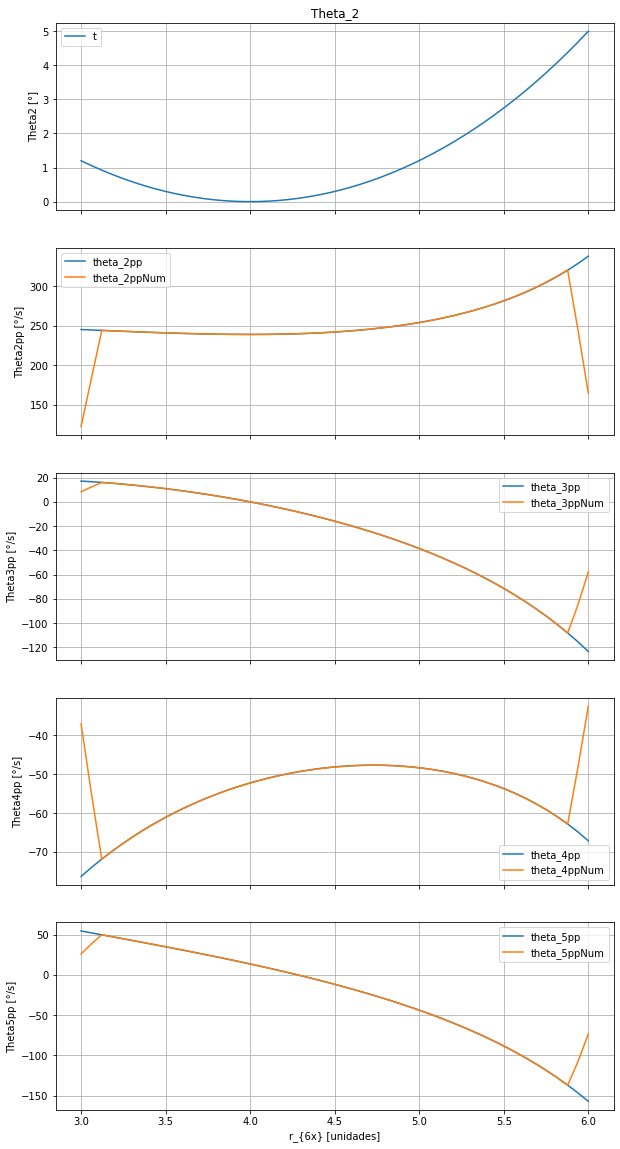

In [391]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True)
plt.rcParams['figure.figsize'] = [10, 20]
ax1.plot(r6xV,np.rad2deg(th2V))
ax1.set_title('Theta_2')
ax1.grid()
ax1.legend("theta_2")
ax1.set_ylabel("Theta2 [°]")

ax2.plot(r6xV,np.rad2deg(th2ppv))
ax2.plot(r6xV,np.rad2deg(th2ppNumv))
ax2.grid()
ax2.legend(["theta_2pp","theta_2ppNum"])
ax2.set_ylabel("Theta2pp [°/s]")

ax3.plot(r6xV,np.rad2deg(th3ppv))
ax3.plot(r6xV,np.rad2deg(th3ppNumv))
ax3.grid()
ax3.legend(["theta_3pp","theta_3ppNum"])
ax3.set_ylabel("Theta3pp [°/s]")


ax4.plot(r6xV,np.rad2deg(th4ppv))
ax4.plot(r6xV,np.rad2deg(th4ppNumv))
ax4.grid()
ax4.legend(["theta_4pp","theta_4ppNum"])
ax4.set_ylabel("Theta4pp [°/s]")

ax5.plot(r6xV,np.rad2deg(th5ppv))
ax5.plot(r6xV,np.rad2deg(th5ppNumv))
ax5.grid()
ax5.legend(["theta_5pp","theta_5ppNum"])
ax5.set_ylabel("Theta5pp [°/s]")
ax5.set_xlabel("r_{6x} [unidades]")


## References

- How-to Mechatronics (2013). *Robot Gripper Mechanism in SolidWorks 2012*. https://www.youtube.com/watch?v=qKZLx1wtFCk&ab_channel=HowToMechatronics. Consulted: 20/09/2021

- Shim, M., Kim, J.-H. (2018). Design and optimization of a robotic gripper for the FEM assembly process of vehicles. Mechanism and Machine Theory. DOI: 10.1016/j.mechmachtheory.2018.07.006